In [1]:
from time import time

from factory_theory.primitives import SOL, IntVal, Belt, no_intersections

In [2]:
import matplotlib.pyplot as plt
def plot_belt(belt, color='b'):
    xs = []
    ys = []
    pts = belt.eval_points()
    for p in pts:
        xs.append(p[0])
        ys.append(p[1])
    plt.plot(xs, ys, '*-', color=color)

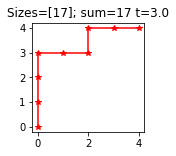

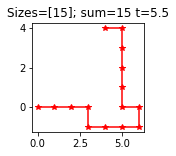

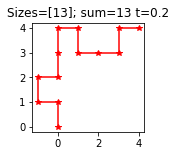

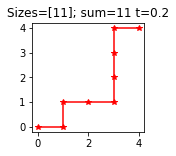

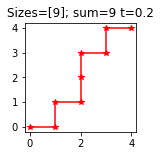

In [3]:
SOL.fresh_solver()

belt_red = Belt()
belt_red.fix_ends((0,0), (4, 4))


sz = IntVal()
SOL.add(sz.v == belt_red.belt_len)

t0 = time()
dts = []
for cur_sz in SOL.shrinker_loop(sz, 38):
    t1 = time()
    dts.append(t1 - t0)
    t0 = time()

    l1 = SOL.eval(belt_red.belt_len)
    
    #plt.subplot(2,3, len(ss))
    plt.gcf().set_size_inches(2,2)
    plot_belt(belt_red, color='r')

    plt.title(f'Sizes={[l1]}; sum={cur_sz} t={dts[-1]:.1f}')
    plt.show()


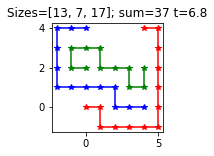

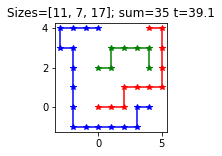

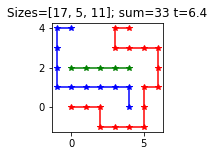

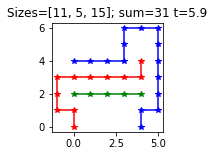

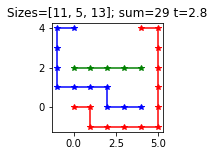

In [4]:
SOL.fresh_solver()

belt1 = Belt()
belt2 = Belt()
belt3 = Belt()

SOL.add(no_intersections(belt1, belt2))
SOL.add(no_intersections(belt1, belt3))
SOL.add(no_intersections(belt2, belt3))

belt1.fix_ends((0,0), (4, 4))
belt2.fix_ends((0,2), (4, 2))
belt3.fix_ends((0,4), (4, 0))

sz = IntVal()
SOL.add(sz.v == belt1.belt_len + belt2.belt_len + belt3.belt_len)

t0 = time()
dts = []
for cur_sz in SOL.shrinker_loop(sz, init=38, restore=False):
    t1 = time()
    dts.append(t1 - t0)
    t0 = time()

    l1 = SOL.eval(belt1.belt_len)
    l2 = SOL.eval(belt2.belt_len)
    l3 = SOL.eval(belt3.belt_len)
    
    #plt.subplot(2,3, len(ss))
    plt.gcf().set_size_inches(2,2)
    plot_belt(belt1, color='r')
    plot_belt(belt2, color='g')
    plot_belt(belt3, color='b')
    plt.title(f'Sizes={[l1, l2, l3]}; sum={cur_sz} t={dts[-1]:.1f}')
    plt.show()
t1 = time()

    